<a href="https://colab.research.google.com/github/Shanthan0/Shanthan0/blob/main/SudanCrisisDataAnalysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
civilian_target_df = pd.read_excel("/content/sudan_hrp_civilian_targeting_events_and_fatalities_by_month-year_as-of-10oct2024.xlsx",sheet_name="Data")
civilian_target_df.head()

,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events,Fatalities
0,Sudan,West Darfur,Foro Baranga,SDN,SD04121,SD04,January,1997,0,0
1,Sudan,Red Sea,Haya,SDN,SD10070,SD10,January,1997,0,0
2,Sudan,South Kordofan,Al Leri,SDN,SD07105,SD07,January,1997,0,0
3,Sudan,South Kordofan,Al Buram,SDN,SD07099,SD07,January,1997,0,0
4,Sudan,Sennar,As Suki,SDN,SD14041,SD14,January,1997,0,0


In [104]:
demonstration_df = pd.read_excel("/content/sudan_hrp_demonstration_events_by_month-year_as-of-10oct2024.xlsx",sheet_name="Data")
demonstration_df.head()

,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events
0,Sudan,West Darfur,Foro Baranga,SDN,SD04121,SD04,January,1997,0
1,Sudan,Red Sea,Haya,SDN,SD10070,SD10,January,1997,0
2,Sudan,South Kordofan,Al Leri,SDN,SD07105,SD07,January,1997,0
3,Sudan,South Kordofan,Al Buram,SDN,SD07099,SD07,January,1997,0
4,Sudan,Sennar,As Suki,SDN,SD14041,SD14,January,1997,0


In [105]:
political_voilence_df = pd.read_excel("/content/sudan_hrp_political_violence_events_and_fatalities_by_month-year_as-of-10oct2024.xlsx",sheet_name="Data")
political_voilence_df.head()

,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events,Fatalities
0,Sudan,West Darfur,Foro Baranga,SDN,SD04121,SD04,January,1997,0,0
1,Sudan,Red Sea,Haya,SDN,SD10070,SD10,January,1997,2,0
2,Sudan,South Kordofan,Al Leri,SDN,SD07105,SD07,January,1997,0,0
3,Sudan,South Kordofan,Al Buram,SDN,SD07099,SD07,January,1997,0,0
4,Sudan,Sennar,As Suki,SDN,SD14041,SD14,January,1997,0,0


In [106]:
civilian_target_df["event"]="civilian_targeting"
demonstration_df["event"]="demonstration"
demonstration_df["Fatalities"]=0
political_voilence_df["event"]="political_voilence"


conflict_df = pd.concat([civilian_target_df,demonstration_df,political_voilence_df])
conflict_df.head()


,Country,Admin1,Admin2,ISO3,Admin2 Pcode,Admin1 Pcode,Month,Year,Events,Fatalities,event
0,Sudan,West Darfur,Foro Baranga,SDN,SD04121,SD04,January,1997,0,0,civilian_targeting
1,Sudan,Red Sea,Haya,SDN,SD10070,SD10,January,1997,0,0,civilian_targeting
2,Sudan,South Kordofan,Al Leri,SDN,SD07105,SD07,January,1997,0,0,civilian_targeting
3,Sudan,South Kordofan,Al Buram,SDN,SD07099,SD07,January,1997,0,0,civilian_targeting
4,Sudan,Sennar,As Suki,SDN,SD14041,SD14,January,1997,0,0,civilian_targeting


In [126]:
conflict_df.shape

(196392, 12)

In [124]:

min_year = conflict_df['Year'].min()
max_year = conflict_df['Year'].max()

print(f"Min Year: {min_year}")
print(f"Max Year: {max_year}")

Min Year: 1997
Max Year: 2024


In [107]:
events_counts = conflict_df.groupby('event')['Events'].sum()

print(events_counts)

event
civilian_targeting     9828
demonstration          6450
political_voilence    20183
Name: Events, dtype: int64


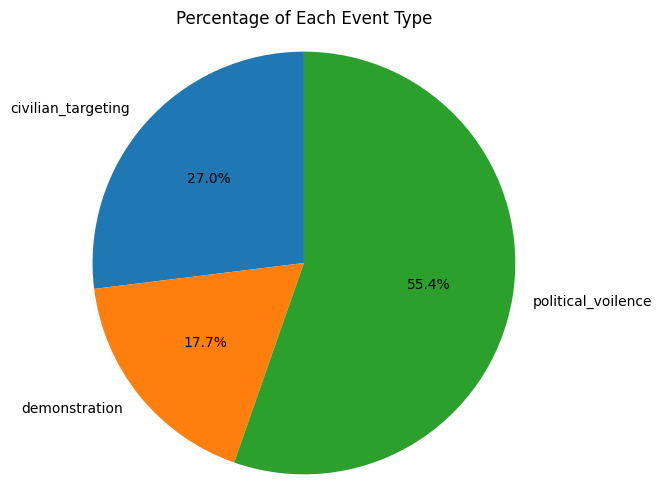

In [145]:

# Calculate the percentage of each event type
event_percentages = (events_counts / events_counts.sum()) * 100

# Create a pie chart to visualize the percentages
plt.figure(figsize=(4, 4))
plt.pie(event_percentages, labels=event_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Each Event Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [108]:
# Group the data by event type and sum the number of fatalities
fatality_counts = conflict_df.groupby('event')['Fatalities'].sum()

print(fatality_counts)

event
civilian_targeting     31963
demonstration              0
political_voilence    104767
Name: Fatalities, dtype: int64


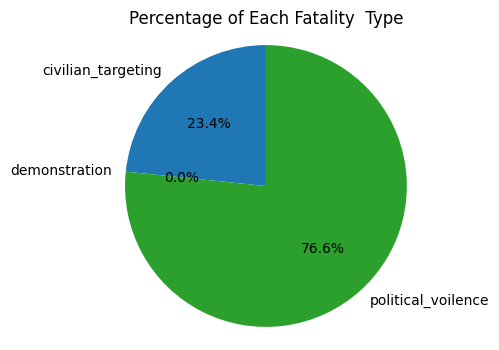

In [170]:

# Calculate the percentage of each event type
event_percentages = (fatality_counts / fatality_counts.sum()) * 100

# Create a pie chart to visualize the percentages
plt.figure(figsize=(4, 4))
plt.pie(event_percentages, labels=event_percentages.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Each Fatality  Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [136]:

# Calculate the total number of days in the dataset
total_days = (max_year - min_year + 1) * 365  # Assuming 365 days per year for simplicity

# Calculate the average number of events per day
average_events_per_day = conflict_df['Events'].sum() / total_days

print(f"Total sum of Fatalities: {conflict_df['Events'].sum()}")
print(f"Average number of Fatalitiesx per day: {average_events_per_day}")

Total sum of events: 36461
Average number of events per day: 3.5676125244618397


In [138]:
# Calculate the average number of events per day
average_events_per_day = conflict_df['Fatalities'].sum() / total_days

print(f"Total sum of Fatalities: {conflict_df['Fatalities'].sum()}")
print(f"Average number of Fatalities per day: {average_events_per_day}")

Total sum of Fatalities: 136730
Average number of Fatalities per day: 13.37866927592955


In [159]:

# Assuming 'conflict_df' is your DataFrame
admin1_event_counts = conflict_df.groupby('Admin1')['Events'].sum().sort_values(ascending=False)
print(admin1_event_counts)

Admin1
Khartoum          8894
North Darfur      5931
South Darfur      3859
Central Darfur    2856
South Kordofan    2348
West Darfur       2043
Al Jazirah        1998
Equatoria         1201
North Kordofan     793
West Kordofan      790
Blue Nile          706
Gedaref            626
Red Sea            593
East Darfur        585
Sennar             540
Kassala            539
Abyei              535
Bahr el Ghazal     460
White Nile         440
River Nile         414
Northern           310
Name: Events, dtype: int64


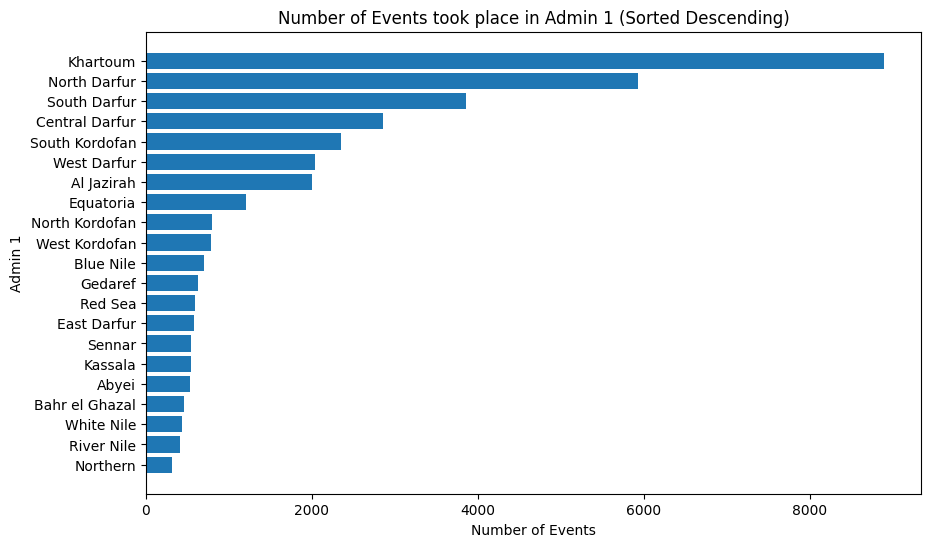

In [163]:

import matplotlib.pyplot as plt

# Assuming 'conflict_df' is your DataFrame
admin1_event_counts = conflict_df.groupby('Admin1')['Events'].sum().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(admin1_event_counts.index, admin1_event_counts.values)  # Use barh for horizontal bar chart
plt.xlabel('Number of Events')
plt.ylabel('Admin 1')
plt.title('Number of Events took place in Admin 1 (Sorted Descending)')
plt.show()

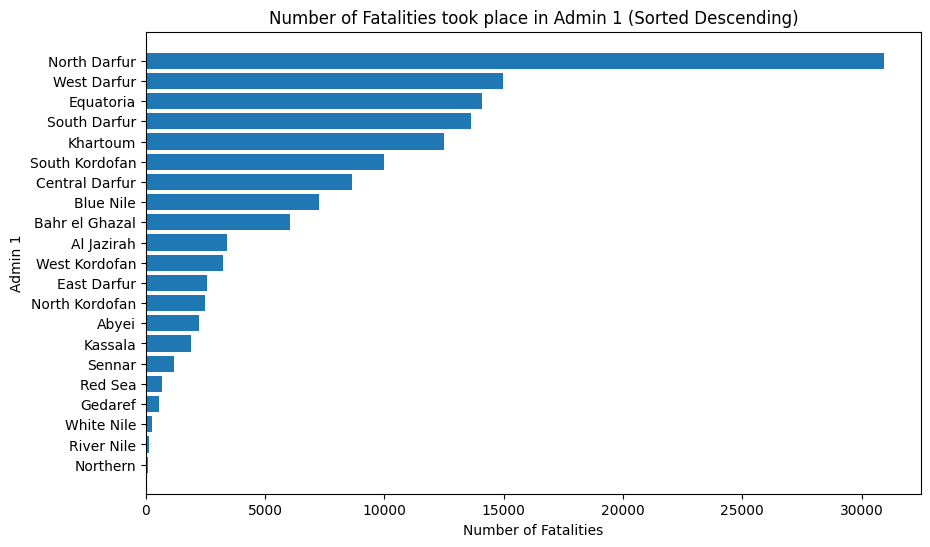

In [165]:

import matplotlib.pyplot as plt

# Assuming 'conflict_df' is your DataFrame
admin1_event_counts = conflict_df.groupby('Admin1')['Fatalities'].sum().sort_values()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(admin1_event_counts.index, admin1_event_counts.values)  # Use barh for horizontal bar chart
plt.xlabel('Number of Fatalities')
plt.ylabel('Admin 1')
plt.title('Number of Fatalities took place in Admin 1 (Sorted Descending)')
plt.show()

In [117]:

# Group data by Admin1 and sum events and fatalities
admin1_data = civilian_target_df.groupby('Admin1').agg({'Events': 'sum', 'Fatalities': 'sum'})

# Sort by number of events in descending order
admin1_data_sorted_events = admin1_data.sort_values('Events', ascending=False)

# Sort by number of fatalities in descending order
admin1_data_sorted_fatalities = admin1_data.sort_values('Fatalities', ascending=False)


print("Number of Events by Admin1 in Descending Order:\n", admin1_data_sorted_events)
print("\nNumber of Fatalities by Admin1 in Descending Order:\n", admin1_data_sorted_fatalities)

Number of Events by Admin1 in Descending Order:
                 Events  Fatalities
Admin1                            
North Darfur      2182        8391
Khartoum          1417        2923
South Darfur      1372        3934
Central Darfur    1039        1921
West Darfur        744        4175
South Kordofan     707        2219
Al Jazirah         589        1222
Equatoria          421        3087
Abyei              180         609
North Kordofan     171         394
West Kordofan      167         533
East Darfur        142         518
Blue Nile          121         444
Gedaref            119         134
Bahr el Ghazal     119         988
Sennar              89         225
White Nile          70          52
Kassala             58          89
Red Sea             55          62
River Nile          42          23
Northern            24          20

Number of Fatalities by Admin1 in Descending Order:
                 Events  Fatalities
Admin1                            
North Darfur      2182

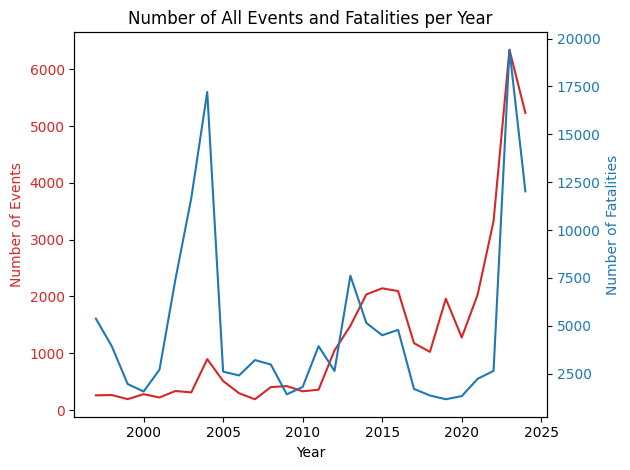

In [118]:

# Group data by year and sum events and fatalities for all event types
yearly_data_all_events = conflict_df.groupby('Year').agg({'Events': 'sum', 'Fatalities': 'sum'})

# Create the plot
fig, ax1 = plt.subplots()

# Plot number of events
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Events', color=color)
ax1.plot(yearly_data_all_events.index, yearly_data_all_events['Events'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for fatalities
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Number of Fatalities', color=color)  # we already handled the x-label with ax1
ax2.plot(yearly_data_all_events.index, yearly_data_all_events['Fatalities'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add title and legend
plt.title('Number of All Events and Fatalities per Year')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

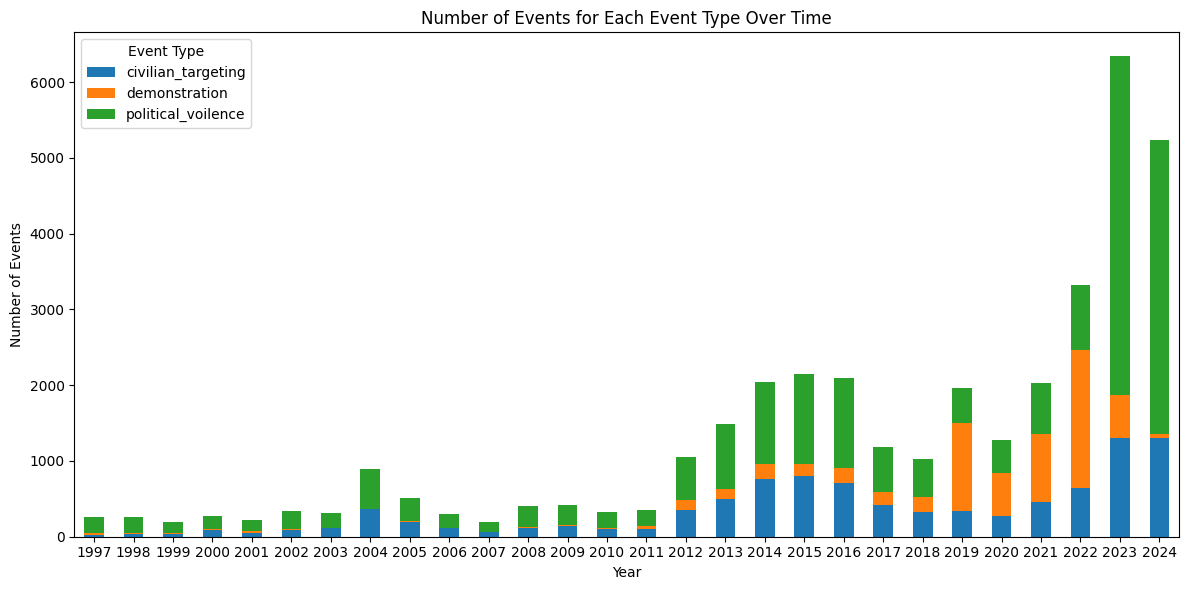

In [143]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'conflict_df'

# Group data by year and event type, then sum the number of events
yearly_event_counts = conflict_df.groupby(['Year', 'event'])['Events'].sum().unstack()

# Create the stacked bar plot
yearly_event_counts.plot(kind='bar',stacked=True, figsize=(12, 6))

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.title('Number of Events for Each Event Type Over Time')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

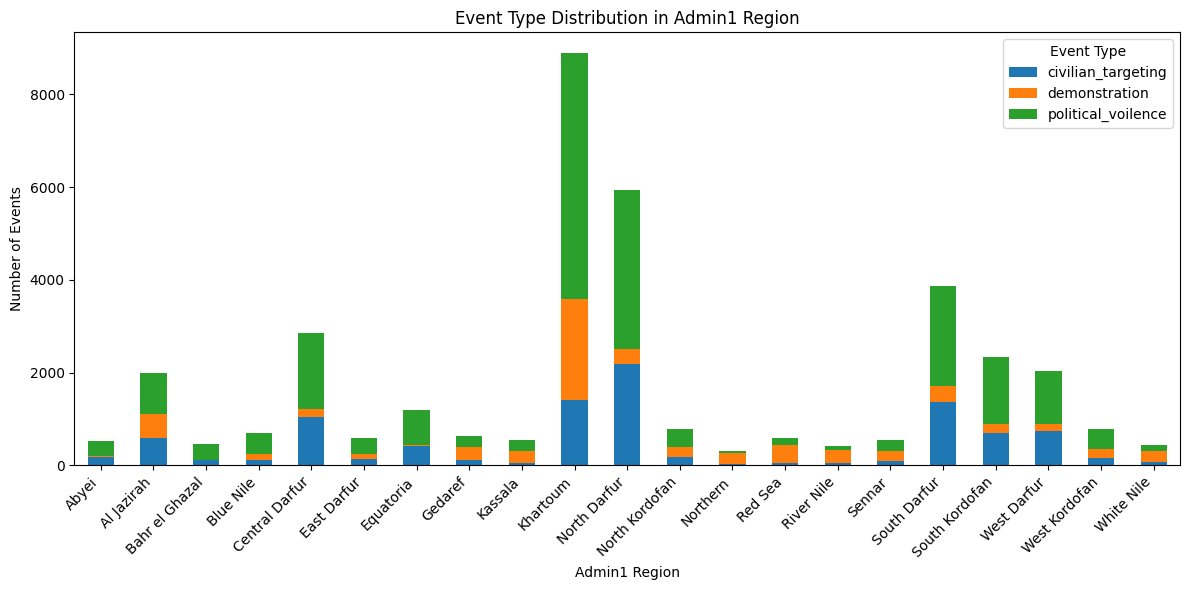

In [166]:


# Assuming your data is in a pandas DataFrame called 'conflict_df'

# Group data by Admin1 and event type, then sum the number of events
admin1_event_counts = conflict_df.groupby(['Admin1', 'event'])['Events'].sum().unstack()

# Create the stacked bar plot
admin1_event_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.xlabel('Admin1 Region')
plt.ylabel('Number of Events')
plt.title('Event Type Distribution in Admin1 Region')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.legend(title='Event Type')
plt.tight_layout()
plt.show()

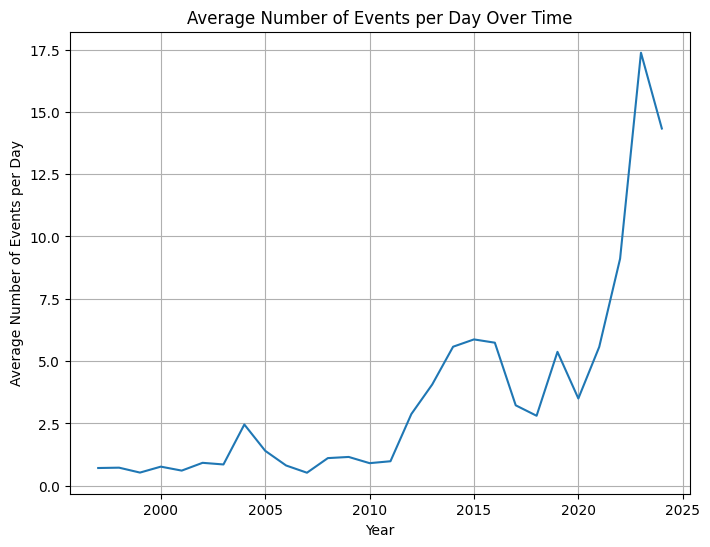

In [139]:

# Calculate the sum of events for each year
yearly_event_sums = conflict_df.groupby('Year')['Events'].sum()

# Calculate the average number of events per day for each year
yearly_average_events = yearly_event_sums / 365  # Assuming 365 days per year

# Create a time plot
plt.figure(figsize=(8, 6))
plt.plot(yearly_average_events.index, yearly_average_events.values)
plt.xlabel('Year')
plt.ylabel('Average Number of Events per Day')
plt.title('Average Number of Events per Day Over Time')
plt.grid(True)
plt.show()

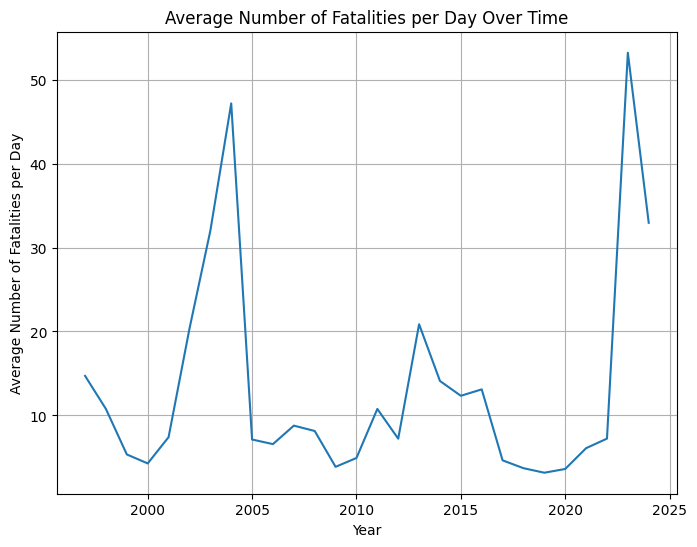

In [140]:

# Calculate the sum of  fatalities for each year
yearly_event_sums = conflict_df.groupby('Year')['Fatalities'].sum()

# Calculate the average number of events per day for each year
yearly_average_events = yearly_event_sums / 365  # Assuming 365 days per year

# Create a time plot
plt.figure(figsize=(8, 6))
plt.plot(yearly_average_events.index, yearly_average_events.values)
plt.xlabel('Year')
plt.ylabel('Average Number of Fatalities per Day')
plt.title('Average Number of Fatalities per Day Over Time')
plt.grid(True)
plt.show()